23083010002_Indah Rahma Abdillah_Tugas EDA

# Stroke Prediction Dataset

Dataset ini digunakan untuk memprediksi kemungkinan seorang pasien mengalami stroke berdasarkan parameter input seperti jenis kelamin, usia, berbagai penyakit, dan status merokok. Setiap baris dalam data berisi informasi tentang pasien.

Berikut variabel-variabel yang ada dalam diabetes dataset ini:

1.  id (nominal): Id unik. 
2.  gender (nominal): Informasi tentang jenis kelamin pasien. Terdapat tiga kategori, "Male", "Female" or "Other".
3.  age (rasio): Usia pasien dalam satuan tahun.
4.  hypertension (nominal): Menunjukkan apakah pasien mengalami hipertensi atau tidak. Nilai 0 berarti tidak mengalami hipertensi, sedangkan nilai 1 berarti mengalami hipertensi.
5.  heart_disease (nominal): Menunjukkan apakah pasien memiliki penyakit jantung atau tidak. Nilai 0 berarti tidak memiliki penyakit jantung, sedangkan nilai 1 berarti memiliki penyakit jantung.
6.  ever_married (nominal): Status pernikahan pasien. Terdapat dua kategori, "No" (belum pernah menikah) atau "Yes" (pernah menikah).
7.  work_type (nominal): Jenis pekerjaan pasien. Terdapat beberapa kategori, "children", "Govt_jov", "Never_worked", "Private", atau "Self-employed".
8.  residence_type (nominal): Menunjukkan apakah pasien tinggal di daerah pedesaan atau perkotaan. Terdapat dua kategori, "Rural" atau "Urban".
9.  avg_glucose_level (rasio): Rata-rata kadar glukosa dalam darah pasien.
10. bmi (rasio): Ukuran berat badan pasien dalam kaitannya dengan tinggi badan (Body Mass Index).
11. smoking_status (nominal): Status merokok pasien. Terdapat beberapa kategori, "formerly smoked", "never smoked", "smokes", atau "Unknown".
12. stroke (nominal): Menunjukkan apakah pasien mengalami stroke atau tidak. Nilai 1 berarti pasien mengalami stroke, sedangkan nilai 0 berarti tidak mengalami stroke.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv ('D:/Semester 3/Analisis Data Eksploratif/Tugas/Tugas 2 EDA/data stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Preprocessing Data

### Mengatasi Missing Value

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
np.sum(df.isnull())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

terdapat 201 missing value pada data ini

Menghapus baris yang memiliki nilai null

In [9]:
df.dropna()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
df_cleaned = df.dropna()

print("\nDataFrame setelah menghapus baris yang bernilai null:")
print(df_cleaned)


DataFrame setelah menghapus baris yang bernilai null:
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  14180  Female  13.0             0              0           No   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           

In [11]:
np.sum(df_cleaned.isnull())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

sudah tidak ada nilai null

## Visualisasi Data

### Diagram Garis

Menunjukkan hunungan antara usia dan tingkat rata-rata glukosa

C:\Users\USER\AppData\Local\Temp\ipykernel_7192\2553713840.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(pd.cut(df['age'], bins=range(0, 85, 5))).mean() # usia dikelompokkanl


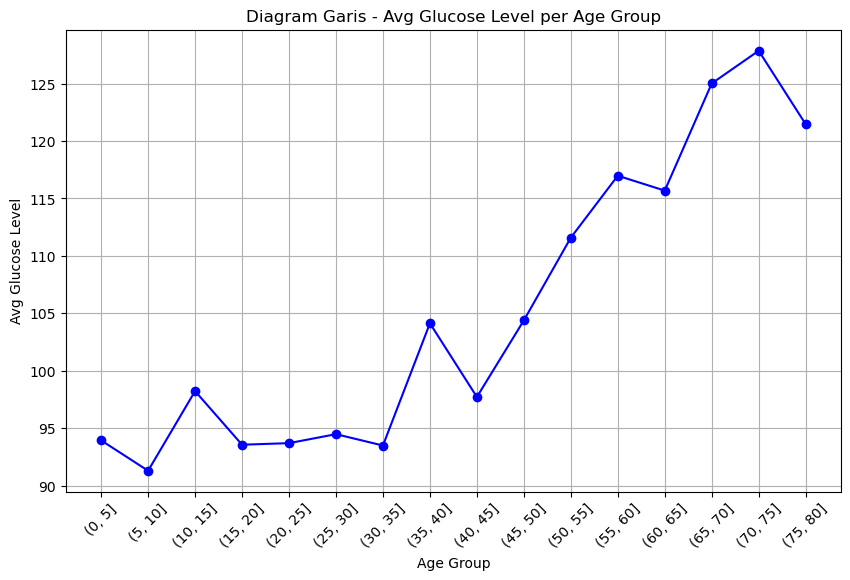

In [12]:
df_grouped = df.groupby(pd.cut(df['age'], bins=range(0, 85, 5))).mean() # usia dikelompokkanl

plt.figure(figsize=(10,6))
plt.plot(df_grouped.index.astype(str), df_grouped['avg_glucose_level'], marker='o', color='blue')
plt.title('Diagram Garis - Avg Glucose Level per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Avg Glucose Level')
plt.xticks(rotation=45)
plt.grid(True)

Diagram tersebut menunjukkan bahwa rata-rata tingkat glukosa darah cenderung meningkat seiring bertambahnya usia, terutama di atas usia 50 tahun.

### Diagram Batang

Menampilkan distribusi work_type dalam bentuk batang

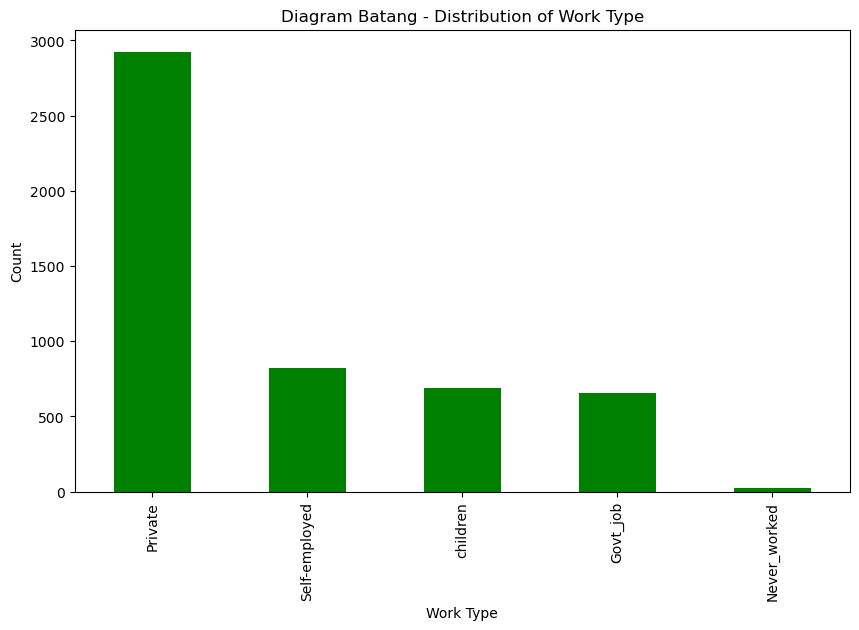

In [13]:
plt.figure(figsize=(10,6))
df['work_type'].value_counts().plot(kind='bar', color='green')
plt.title('Diagram Batang - Distribution of Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()

Dari diagram, kita dapat melihat bahwa mayoritas orang bekerja di sektor Private, dengan jumlah yang jauh lebih besar dibandingkan kategori lainnya.

### Diagram Pencar

Menampilkan hubungan antara usia dan BMI

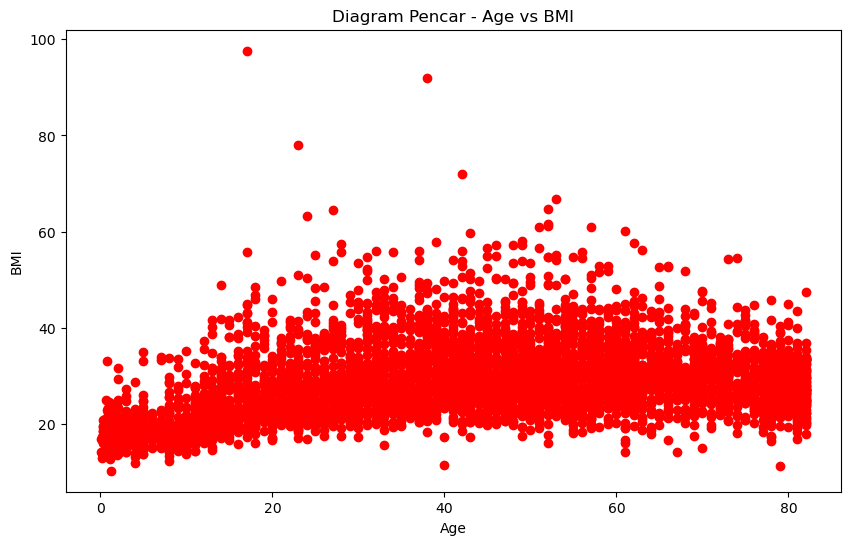

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(df['age'], df['bmi'], color='red')
plt.title('Diagram Pencar - Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

Mayoritas titik terkonsentrasi pada kisaran BMI 20-40 untuk hampir semua kelompok usia, dengan sedikit peningkatan jumlah BMI yang lebih tinggi (di atas 40) di beberapa kelompok usia.

### Diagram Gelembung

Mirip dengan diagram pencar, tetapi ukuran titik menunjukkan nilai BMI

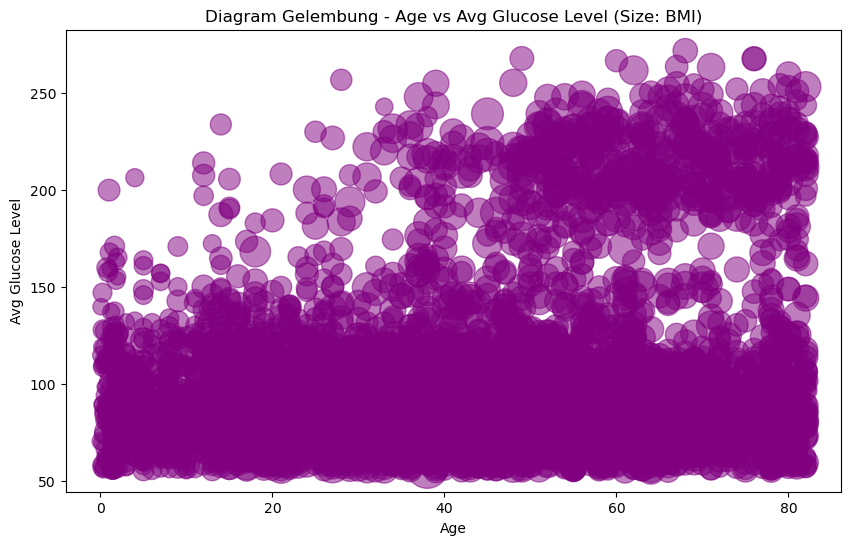

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(df['age'], df['avg_glucose_level'], s=df['bmi']*10, alpha=0.5, color='purple')
plt.title('Diagram Gelembung - Age vs Avg Glucose Level (Size: BMI)')
plt.xlabel('Age')
plt.ylabel('Avg Glucose Level')
plt.show()

Kepadatan gelembung pada kelompok usia tertentu, terutama di usia pertengahan hingga tua menunjukkan banyak pasien dengan tingkat glukosa dan BMI yang bervariasi.

### Area Plot dan Stacked Plot

Memvisualisasikan tiga atribut utama (age, avg_glucose_level, dan bmi) dalam bentuk area, baik terpisah maupun tumpuk

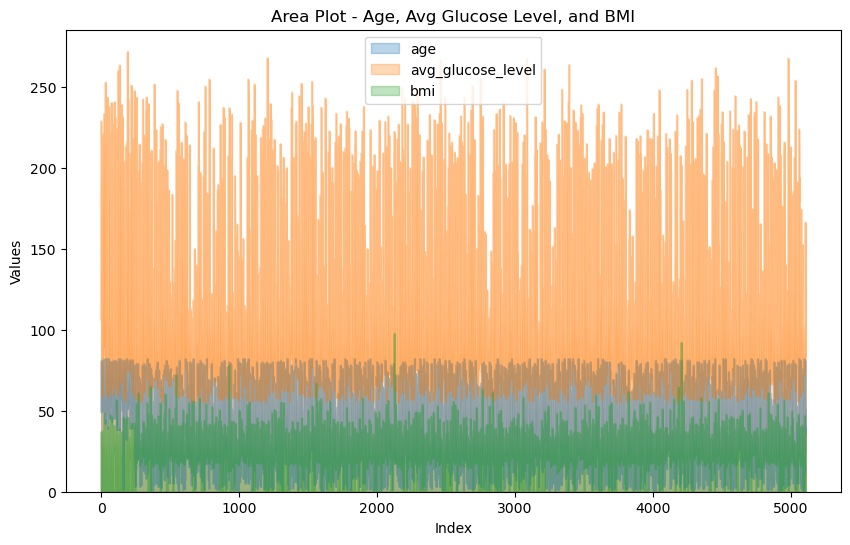

In [16]:
df[['age', 'avg_glucose_level', 'bmi']].plot(kind='area', stacked=False, alpha=0.3, figsize=(10,6))
plt.title('Area Plot - Age, Avg Glucose Level, and BMI')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

Area plot dan stacked plot di atas menggambarkan kontribusi kumulatif dari usia, tingkat glukosa rata-rata, dan BMI terhadap nilai total.

###  Diagram Lingkaran

Menampilkan proporsi status merokok dari pasien

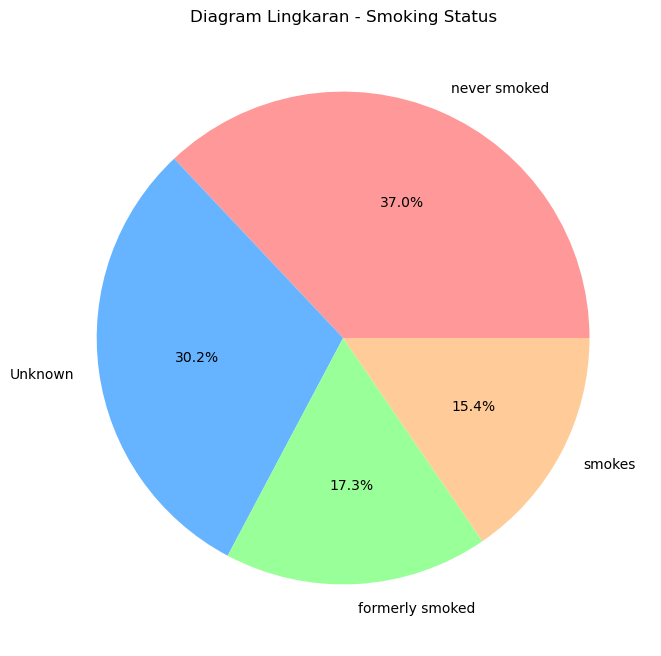

In [16]:
plt.figure(figsize=(8,8))
df['smoking_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Diagram Lingkaran - Smoking Status')
plt.ylabel('')
plt.show()

Diagram di atas menggambarkan persentase dari setiap kategori status merokok di antara populasi pasien dalam dataset.

### Diagram Tabel

Tabel pivot dengan nilai rata-rata dari avg_glucose_level dan bmi per kategori gender dan stroke

In [17]:
table_data = pd.pivot_table(df, values=['avg_glucose_level', 'bmi'], index=['gender', 'stroke'], aggfunc='mean')
print(table_data)

               avg_glucose_level        bmi
gender stroke                              
Female 0              103.051753  29.015952
       1              124.414397  30.218333
Male   0              107.255112  28.547711
       1              143.159352  30.812360
Other  0              143.330000  22.400000


### Diagram Polar

Memetakan rata-rata dari beberapa atribut dalam diagram radar atau polar

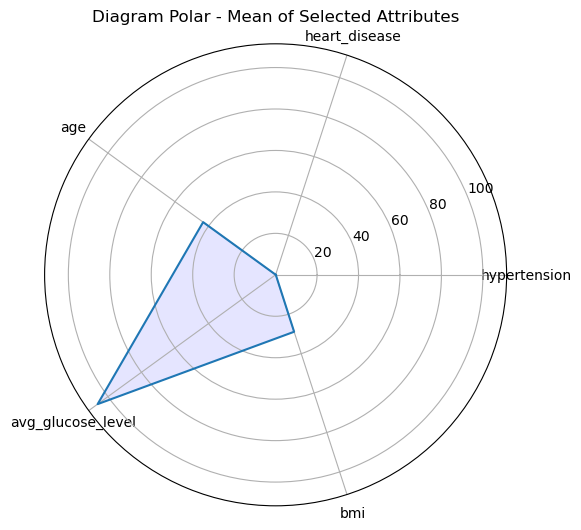

In [19]:
plt.figure(figsize=(6,6))
categories = ['hypertension', 'heart_disease', 'age', 'avg_glucose_level', 'bmi']
values = df[categories].mean().values
values = list(values) + [values[0]]
angles = [n / float(len(categories)) * 2 * 3.14159 for n in range(len(categories))]
angles += angles[:1]

ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories)
ax.plot(angles, values)
ax.fill(angles, values, 'b', alpha=0.1)
plt.title('Diagram Polar - Mean of Selected Attributes')
plt.show()

### Histogram

Menampilkan distribusi BMI

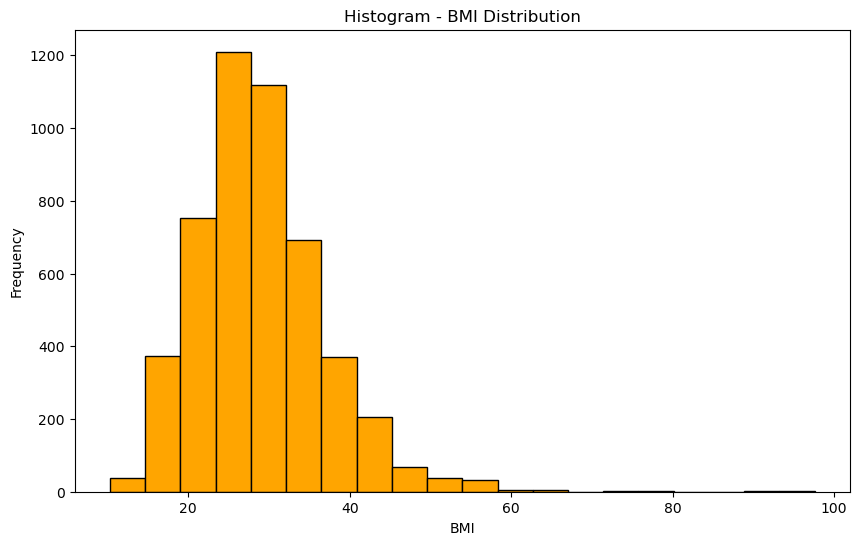

In [20]:
plt.figure(figsize=(10,6))
plt.hist(df['bmi'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram - BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

### Diagram Lollipop

Memvisualisasikan hubungan antara usia dan tingkat glukosa rata-rata dalam bentuk lollipop

C:\Users\USER\AppData\Local\Temp\ipykernel_11720\627456902.py:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(df_sorted['age'], df_sorted['avg_glucose_level'], basefmt=" ", use_line_collection=True)


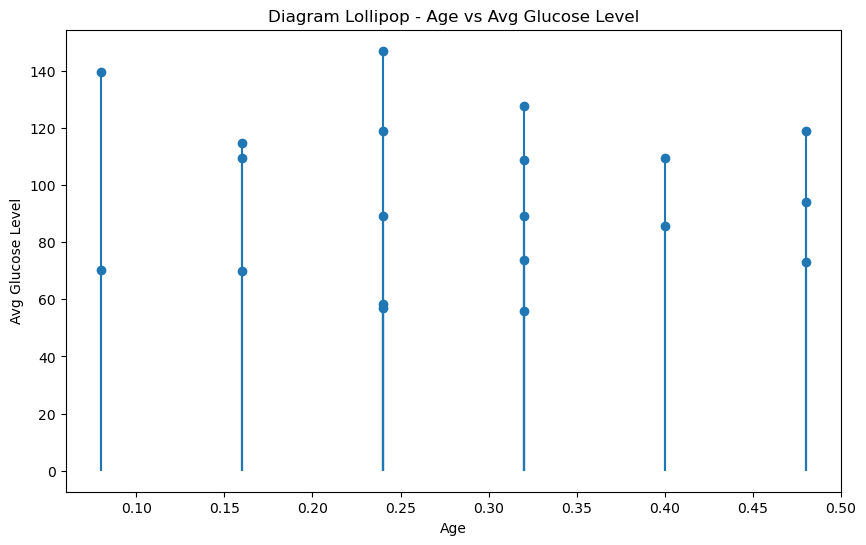

In [21]:
df_sorted = df.sort_values('age').head(20)  # Sort and take first 20 for clarity
plt.figure(figsize=(10,6))
plt.stem(df_sorted['age'], df_sorted['avg_glucose_level'], basefmt=" ", use_line_collection=True)
plt.title('Diagram Lollipop - Age vs Avg Glucose Level')
plt.xlabel('Age')
plt.ylabel('Avg Glucose Level')
plt.show()